<body style="background-color:Gray;">

<h1 style=" text-align:center ; ">Assignment 3</h1>
<h2 style= "text-align:center"><b> Kritika Singh</b></h2>
<h3 style=" text-align:center; ">CS 6304 -- Deep LEraning</h3>    


</body>



Task:
- Model with L1 regularization
- Model with L2 regularization
- Model with L1L2 regularization
- Model with Batch normalization

Task 1: Train these four models (early stopping should be applied) using the same training parameters 
used with the “dropout” technique in the notebook. Report predictions on the testing set from 
these four models. 

Task 2: Plot the training/validation loss and accuracy vs epochs from the four training procedures.

- You have the files `mnist_training.csv`, `mnist_train_class.csv`, `mnist_testing.csv`, `mnist_test_class.csv`. 
- `mnist_training.csv` consists of 60,000 rows and 784 columns (representing 784 pixels in 28x28 image). Each pixel is treated as a feature. 
- `mnist_testing.csv` consists of 10,000 rows and 784 columns (representing 784 pixels in 28x28 image). Each pixel is treated as a feature. 
- `mnist_train_class.csv`, `mnist_test_class.csv` are csv files (each with one column) containing the class labels.

### Importing required packages and loading the data

In [1]:
import numpy as np
x_train_original = np.loadtxt('mnist_training.csv', delimiter=',')/255
y_train_original = np.loadtxt('mnist_train_class.csv', delimiter=',')
x_test_original = np.loadtxt('mnist_testing.csv', delimiter=',')/255
y_test_original= np.loadtxt('mnist_test_class.csv', delimiter=',')

We will use `2%` of the actual training set to reduce the training set size

In [2]:
from sklearn.model_selection import train_test_split
x, x_train_small, y, y_train_small = train_test_split(x_train_original, y_train_original, test_size=0.02, random_state=42)


print(x_train_small.shape)
print(x_test_original.shape)
print(y_train_small.shape)
print(y_test_original.shape)

(1200, 784)
(10000, 784)
(1200,)
(10000,)


In [3]:
y_train_small = y_train_small.astype(int)
y_test_original = y_test_original.astype(int)
print(np.unique(y_train_small))
print(np.unique(y_test_original))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [4]:
from keras.utils import np_utils
NB_CLASSES = 10 #number of classes
y_train= np_utils.to_categorical(y_train_small, NB_CLASSES)
y_test= np_utils.to_categorical(y_test_original, NB_CLASSES)
y_train = y_train.astype(int)
y_test = y_test.astype(int)
print('shape of y_train and y_test after categorical')
print(y_train.shape)
print(y_test.shape)

shape of y_train and y_test after categorical
(1200, 10)
(10000, 10)


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation 
from tensorflow.keras.optimizers import SGD 

In [6]:
NB_EPOCH = 150 # number of epoch
BATCH_SIZE = 30 # mini batch size
VERBOSE = 1 #display results during training
OPTIMIZER = SGD() # choose optimizer
VALIDATION_SPLIT = 0.2 #80% training and 20%validation
METRICS =['accuracy']
LOSS = 'categorical_crossentropy' # because of multiclass

In [7]:
import matplotlib
import matplotlib.pyplot as plt
def plotHistory(Tuning):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    axs[0].plot(Tuning.history['loss'])
    axs[0].plot(Tuning.history['val_loss'])
    axs[0].set_title('loss vs epoch')
    #axs[0].set_ylim(0.0,0.7)
    axs[0].set_ylabel('loss')
    axs[0].set_xlabel('epoch')
    axs[0].legend(['train', 'vali'], loc='upper left')
    
    axs[1].plot(Tuning.history['accuracy'])
    axs[1].plot(Tuning.history['val_accuracy'])
    axs[1].set_title('accuracy vs epoch')
    axs[1].set_ylabel('accuracy')
    axs[1].set_xlabel('epoch')
    #axs[1].set_ylim(0.5,1)
    axs[1].legend(['train', 'vali'], loc='upper left')
    plt.show(block = False)
    plt.show()
    

### We will consider a model with two hidden layer

In [8]:
NB_EPOCH = 150

from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
model2 = Sequential()
model2.add(Dense(500,input_shape=(x_train_small.shape[1],)))
model2.add(Activation('relu'))
model2.add(Dense(500))
model2.add(Activation('relu'))
model2.add(Dense(500))
model2.add(Activation('relu'))
model2.add(Dense(10))
model2.add(Activation('softmax'))
print(model2.summary())

early_stopping_monitor = EarlyStopping(monitor='val_loss',patience = 8)

filepath="best_model2.hdf5"
checkpoint = ModelCheckpoint(filepath,monitor='val_loss',verbose=1,save_best_only=True)
model2.compile(loss=LOSS, optimizer = SGD(), metrics =METRICS)
Tuning_model2 = model2.fit(x_train_small,y_train,batch_size=BATCH_SIZE, epochs = NB_EPOCH, verbose = VERBOSE,
                               validation_split = VALIDATION_SPLIT,callbacks=[checkpoint,early_stopping_monitor])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 activation (Activation)     (None, 500)               0         
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 activation_1 (Activation)   (None, 500)               0         
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 activation_2 (Activation)   (None, 500)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                5

#### Model2 stops at around epoch 40  compared to Model1 stopping at epoch 100. Model2 overfits faster than model1 because of its complexity.

### Model2 with dropout in hidden layers

In [9]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.layers import Dropout
model2_dropout = Sequential()
model2_dropout.add(Dense(500,activation='relu',input_shape=(x_train_small.shape[1],)))
model2_dropout.add(Dropout(0.5))
model2_dropout.add(Dense(500,activation='relu'))
model2_dropout.add(Dropout(0.5))
model2_dropout.add(Dense(500,activation='relu'))
model2_dropout.add(Dropout(0.5))
model2_dropout.add(Dense(10))
model2_dropout.add(Activation('softmax'))
print(model2_dropout.summary())
 
early_stopping_monitor = EarlyStopping(monitor='val_loss',patience = 8)

filepath="best_model2_dropout.hdf5"
checkpoint = ModelCheckpoint(filepath,monitor='val_loss',verbose=1,save_best_only=True)
model2_dropout.compile(loss=LOSS, optimizer = SGD(), metrics =METRICS)
Tuning_model2_dropout = model2_dropout.fit(x_train_small,y_train,batch_size=BATCH_SIZE, epochs = NB_EPOCH, verbose = VERBOSE,
                                validation_split = VALIDATION_SPLIT,callbacks=[checkpoint,early_stopping_monitor])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 500)               392500    
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                                 
 dense_5 (Dense)             (None, 500)               250500    
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                                 
 dense_6 (Dense)             (None, 500)               250500    
                                                                 
 dropout_2 (Dropout)         (None, 500)               0         
                                                                 
 dense_7 (Dense)             (None, 10)               

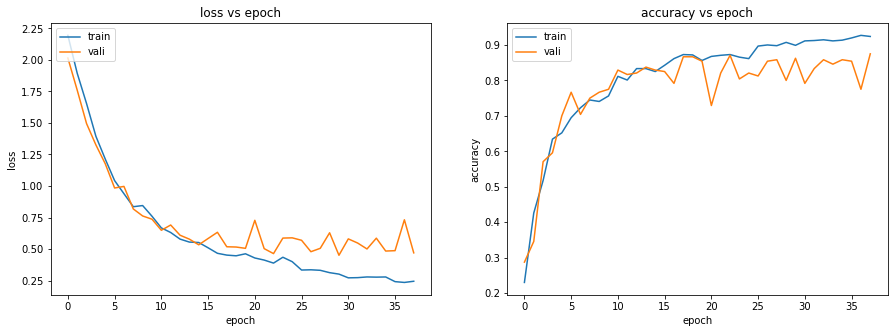

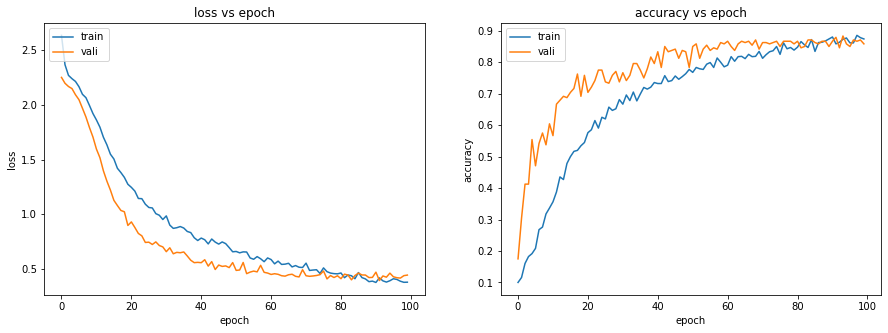

In [10]:
plotHistory(Tuning_model2)
plotHistory(Tuning_model2_dropout)

### Model with L1 regularization

In [11]:
from tensorflow.keras import regularizers

model2_l1 = Sequential()
model2_l1.add(Dense(500,activation='relu',input_shape=(x_train_small.shape[1],),kernel_regularizer=regularizers.l1(0.001)))
model2_l1.add(Dense(200,activation='relu',kernel_regularizer=regularizers.l1(0.001)))
model2_l1.add(Dense(10))
model2_l1.add(Activation('softmax'))
print(model2_l1.summary())

early_stopping_monitor = EarlyStopping(monitor='val_loss',patience = 8)

filepath="best_model2_l1.hdf5"
checkpoint = ModelCheckpoint(filepath,monitor='val_loss',verbose=1,save_best_only=True)
model2.compile(loss=LOSS, optimizer = SGD(), metrics =METRICS)
Tuning_model2_l1 = model2.fit(x_train_small,y_train,batch_size=BATCH_SIZE, epochs = NB_EPOCH, verbose = VERBOSE,
                               validation_split = VALIDATION_SPLIT,callbacks=[checkpoint,early_stopping_monitor])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 500)               392500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 10)                2010      
                                                                 
 activation_5 (Activation)   (None, 10)                0         
                                                                 
Total params: 494,710
Trainable params: 494,710
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/150
29/32 [==========================>...] - ETA: 0s - loss: 0.3578 - accuracy: 0.8885
Epoch 1: val_loss improved from inf to 0.50745, saving model to best_model2_l1.h

### Model with L1 regularization with dropout

In [12]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.layers import Dropout
model2_l1_dropout = Sequential()
model2_l1_dropout.add(Dense(500,activation='relu',input_shape=(x_train_small.shape[1],)))
model2_l1_dropout.add(Dropout(0.5))
model2_l1_dropout.add(Dense(500,activation='relu'))
model2_l1_dropout.add(Dropout(0.5))
model2_l1_dropout.add(Dense(10))
model2_l1_dropout.add(Activation('softmax'))
print(model2_l1_dropout.summary())
 
early_stopping_monitor = EarlyStopping(monitor='val_loss',patience = 8)

filepath="best_model2_l1_dropout.hdf5"
checkpoint = ModelCheckpoint(filepath,monitor='val_loss',verbose=1,save_best_only=True)
model2_l1_dropout.compile(loss=LOSS, optimizer = SGD(), metrics =METRICS)
Tuning_model2_l1_dropout = model2_l1_dropout.fit(x_train_small,y_train,batch_size=BATCH_SIZE, epochs = NB_EPOCH, verbose = VERBOSE,
                                validation_split = VALIDATION_SPLIT,callbacks=[checkpoint,early_stopping_monitor])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 500)               392500    
                                                                 
 dropout_3 (Dropout)         (None, 500)               0         
                                                                 
 dense_12 (Dense)            (None, 500)               250500    
                                                                 
 dropout_4 (Dropout)         (None, 500)               0         
                                                                 
 dense_13 (Dense)            (None, 10)                5010      
                                                                 
 activation_6 (Activation)   (None, 10)                0         
                                                                 
Total params: 648,010
Trainable params: 648,010
Non-tr

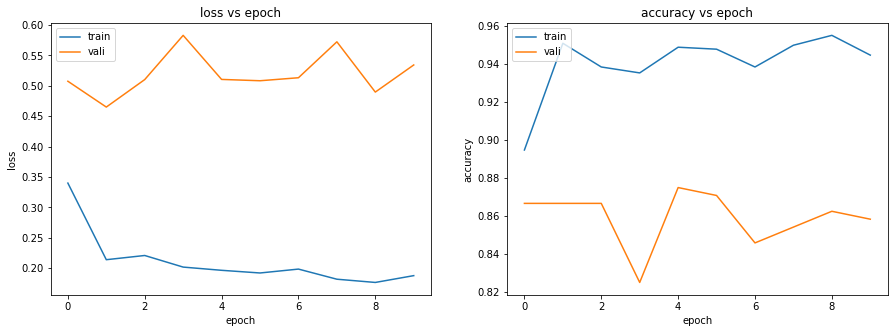

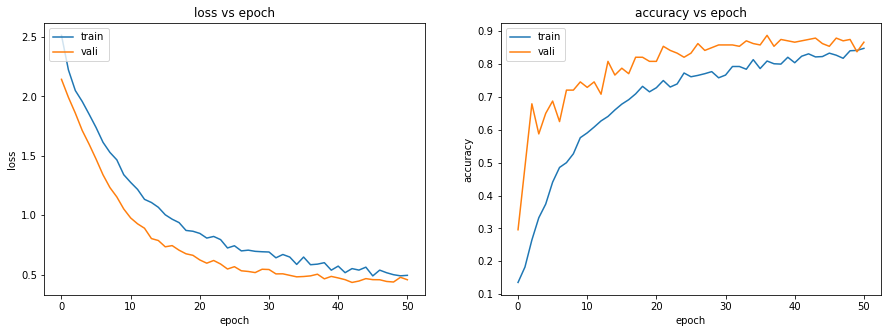

In [13]:
plotHistory(Tuning_model2_l1)
plotHistory(Tuning_model2_l1_dropout)

`kernel_regularizer=regularizers.l1(0.001)`, the value `0.001` is the regularization parameter which can also be tuned.

### Model2 with L2 regularization

In [14]:
from tensorflow.keras import regularizers
model2_l2 = Sequential()
model2_l2.add(Dense(500,activation='relu',input_shape=(x_train_small.shape[1],),kernel_regularizer=regularizers.l2(0.001)))
model2_l2.add(Dense(200,activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model2_l2.add(Dense(NB_CLASSES))
model2_l2.add(Activation('softmax'))
print(model2_l2.summary())

early_stopping_monitor = EarlyStopping(monitor='val_loss',patience = 8)

filepath="best_model2_l2.hdf5"
checkpoint = ModelCheckpoint(filepath,monitor='val_loss',verbose=1,save_best_only=True)
model2.compile(loss=LOSS, optimizer = SGD(), metrics =METRICS)
Tuning_model2_l2 = model2.fit(x_train_small,y_train,batch_size=BATCH_SIZE, epochs = NB_EPOCH, verbose = VERBOSE,
                               validation_split = VALIDATION_SPLIT,callbacks=[checkpoint,early_stopping_monitor])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 500)               392500    
                                                                 
 dense_15 (Dense)            (None, 200)               100200    
                                                                 
 dense_16 (Dense)            (None, 10)                2010      
                                                                 
 activation_7 (Activation)   (None, 10)                0         
                                                                 
Total params: 494,710
Trainable params: 494,710
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/150
28/32 [=========================>....] - ETA: 0s - loss: 0.1699 - accuracy: 0.9476
Epoch 1: val_loss improved from inf to 0.45236, saving model to best_model2_l2.h

### Model with L2 regularization with dropout

In [15]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.layers import Dropout
model2_l2_dropout = Sequential()
model2_l2_dropout.add(Dense(500,activation='relu',input_shape=(x_train_small.shape[1],)))
model2_l2_dropout.add(Dropout(0.5))
model2_l2_dropout.add(Dense(500,activation='relu'))
model2_l2_dropout.add(Dropout(0.5))
model2_l2_dropout.add(Dense(10))
model2_l2_dropout.add(Activation('softmax'))
print(model2_l2_dropout.summary())
 
early_stopping_monitor = EarlyStopping(monitor='val_loss',patience = 8)

filepath="best_model2_l2_dropout.hdf5"
checkpoint = ModelCheckpoint(filepath,monitor='val_loss',verbose=1,save_best_only=True)
model2_l2_dropout.compile(loss=LOSS, optimizer = SGD(), metrics =METRICS)
Tuning_model2_l2_dropout = model2_l2_dropout.fit(x_train_small,y_train,batch_size=BATCH_SIZE, epochs = NB_EPOCH, verbose = VERBOSE,
                                validation_split = VALIDATION_SPLIT,callbacks=[checkpoint,early_stopping_monitor])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 500)               392500    
                                                                 
 dropout_5 (Dropout)         (None, 500)               0         
                                                                 
 dense_18 (Dense)            (None, 500)               250500    
                                                                 
 dropout_6 (Dropout)         (None, 500)               0         
                                                                 
 dense_19 (Dense)            (None, 10)                5010      
                                                                 
 activation_8 (Activation)   (None, 10)                0         
                                                                 
Total params: 648,010
Trainable params: 648,010
Non-tr

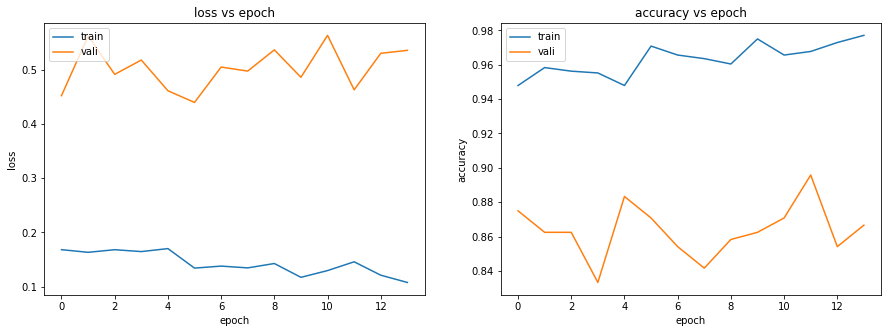

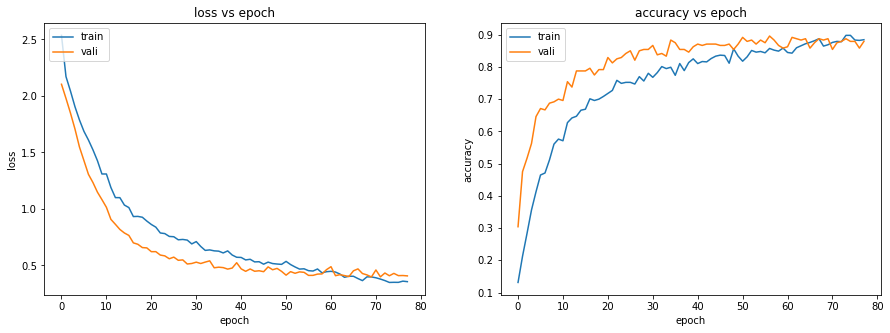

In [16]:
plotHistory(Tuning_model2_l2)
plotHistory(Tuning_model2_l2_dropout)

### Model2 with L1 and L2 regularization

In [17]:
from tensorflow.keras import regularizers
model2_l1l2 = Sequential()
model2_l1l2.add(Dense(500,activation='relu',input_shape=(x_train_small.shape[1],),kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001)))
model2_l1l2.add(Dense(200,activation='relu',kernel_regularizer=regularizers.l1_l2(l1=0.01,l2=0.001)))
model2_l1l2.add(Dense(NB_CLASSES))
model2_l1l2.add(Activation('softmax'))
print(model2_l1l2.summary())

early_stopping_monitor = EarlyStopping(monitor='val_loss',patience = 8)

filepath="best_model2_l1l2.hdf5"
checkpoint = ModelCheckpoint(filepath,monitor='val_loss',verbose=1,save_best_only=True)
model2.compile(loss=LOSS, optimizer = SGD(), metrics =METRICS)
Tuning_model2_l1l2 = model2.fit(x_train_small,y_train,batch_size=BATCH_SIZE, epochs = NB_EPOCH, verbose = VERBOSE,
                               validation_split = VALIDATION_SPLIT,callbacks=[checkpoint,early_stopping_monitor])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 500)               392500    
                                                                 
 dense_21 (Dense)            (None, 200)               100200    
                                                                 
 dense_22 (Dense)            (None, 10)                2010      
                                                                 
 activation_9 (Activation)   (None, 10)                0         
                                                                 
Total params: 494,710
Trainable params: 494,710
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/150
28/32 [=========================>....] - ETA: 0s - loss: 0.1011 - accuracy: 0.9786
Epoch 1: val_loss improved from inf to 0.46203, saving model to best_model2_l1l2

### Model with L1  and L2 regularization with dropout

In [18]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.layers import Dropout
model2_l1l2_dropout = Sequential()
model2_l1l2_dropout.add(Dense(500,activation='relu',input_shape=(x_train_small.shape[1],)))
model2_l1l2_dropout.add(Dropout(0.5))
model2_l1l2_dropout.add(Dense(500,activation='relu'))
model2_l1l2_dropout.add(Dropout(0.5))
model2_l1l2_dropout.add(Dense(10))
model2_l1l2_dropout.add(Activation('softmax'))
print(model2_l1l2_dropout.summary())
 
early_stopping_monitor = EarlyStopping(monitor='val_loss',patience = 8)

filepath="best_model2_l1l2_dropout.hdf5"
checkpoint = ModelCheckpoint(filepath,monitor='val_loss',verbose=1,save_best_only=True)
model2_l1l2_dropout.compile(loss=LOSS, optimizer = SGD(), metrics =METRICS)
Tuning_model2_l1l2_dropout = model2_l1l2_dropout.fit(x_train_small,y_train,batch_size=BATCH_SIZE, epochs = NB_EPOCH, verbose = VERBOSE,
                                validation_split = VALIDATION_SPLIT,callbacks=[checkpoint,early_stopping_monitor])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 500)               392500    
                                                                 
 dropout_7 (Dropout)         (None, 500)               0         
                                                                 
 dense_24 (Dense)            (None, 500)               250500    
                                                                 
 dropout_8 (Dropout)         (None, 500)               0         
                                                                 
 dense_25 (Dense)            (None, 10)                5010      
                                                                 
 activation_10 (Activation)  (None, 10)                0         
                                                                 
Total params: 648,010
Trainable params: 648,010
Non-tr

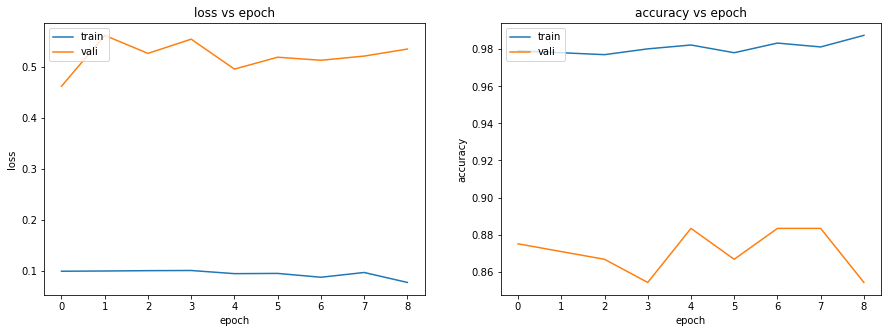

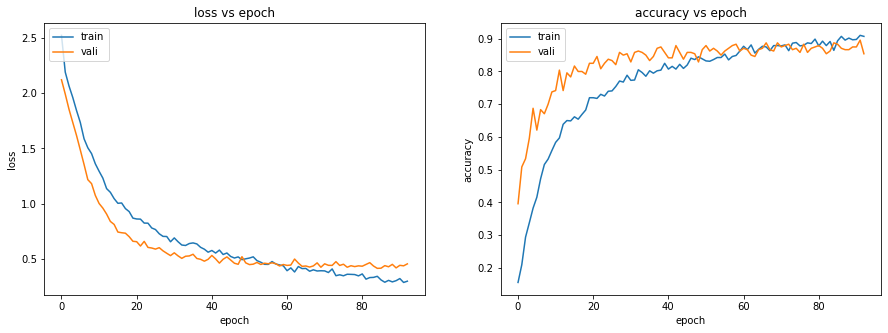

In [19]:
plotHistory(Tuning_model2_l1l2)
plotHistory(Tuning_model2_l1l2_dropout)

### Model2 with batch normization

In [20]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization

model2_bn = Sequential()
model2_bn.add(Dense(200,input_shape=(x_train_small.shape[1],)))
model2_bn.add(Activation('relu'))
model2_bn.add(BatchNormalization())
model2_bn.add(Dense(200))
model2_bn.add(Activation('relu'))
model2_bn.add(BatchNormalization())
model2_bn.add(Dense(1))
model2_bn.add(Activation('sigmoid'))
print(model2_bn.summary())

early_stopping_monitor = EarlyStopping(monitor='val_loss',patience = 8)

filepath="best_model2_bn.hdf5"
checkpoint = ModelCheckpoint(filepath,monitor='val_loss',verbose=1,save_best_only=True)
model2.compile(loss=LOSS, optimizer = SGD(), metrics =METRICS)
Tuning_model2_bn = model2.fit(x_train_small,y_train,batch_size=BATCH_SIZE, epochs = NB_EPOCH, verbose = VERBOSE,
                               validation_split = VALIDATION_SPLIT,callbacks=[checkpoint,early_stopping_monitor])

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 200)               157000    
                                                                 
 activation_11 (Activation)  (None, 200)               0         
                                                                 
 batch_normalization (BatchN  (None, 200)              800       
 ormalization)                                                   
                                                                 
 dense_27 (Dense)            (None, 200)               40200     
                                                                 
 activation_12 (Activation)  (None, 200)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 200)              800       
 hNormalization)                                      

### Model2 with batch normization with dropout 

In [21]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.layers import Dropout
model2_bn_dropout = Sequential()
model2_bn_dropout.add(Dense(500,activation='relu',input_shape=(x_train_small.shape[1],)))
model2_bn_dropout.add(Dropout(0.5))
model2_bn_dropout.add(Dense(500,activation='relu'))
model2_bn_dropout.add(Dropout(0.5))
model2_bn_dropout.add(Dense(10))
model2_bn_dropout.add(Activation('softmax'))
print(model2_bn_dropout.summary())
 
early_stopping_monitor = EarlyStopping(monitor='val_loss',patience = 8)

filepath="best_model2_bn_dropout.hdf5"
checkpoint = ModelCheckpoint(filepath,monitor='val_loss',verbose=1,save_best_only=True)
model2_bn_dropout.compile(loss=LOSS, optimizer = SGD(), metrics =METRICS)
Tuning_model2_bn_dropout = model2_bn_dropout.fit(x_train_small,y_train,batch_size=BATCH_SIZE, epochs = NB_EPOCH, verbose = VERBOSE,
                                validation_split = VALIDATION_SPLIT,callbacks=[checkpoint,early_stopping_monitor])

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 500)               392500    
                                                                 
 dropout_9 (Dropout)         (None, 500)               0         
                                                                 
 dense_30 (Dense)            (None, 500)               250500    
                                                                 
 dropout_10 (Dropout)        (None, 500)               0         
                                                                 
 dense_31 (Dense)            (None, 10)                5010      
                                                                 
 activation_14 (Activation)  (None, 10)                0         
                                                                 
Total params: 648,010
Trainable params: 648,010
Non-tr

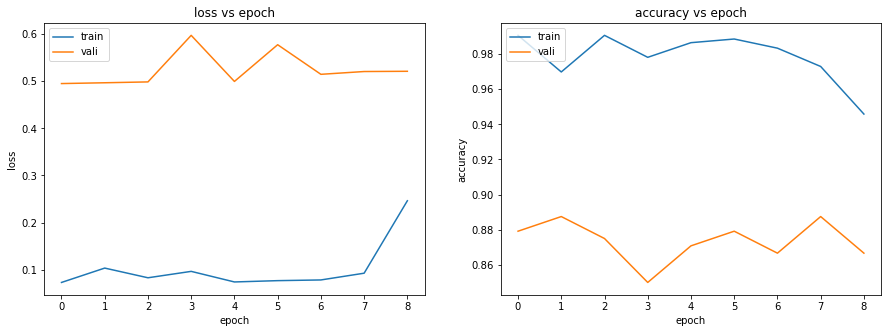

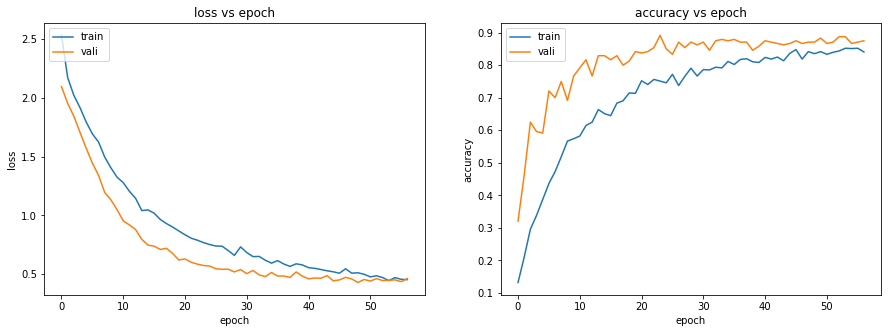

In [22]:
plotHistory(Tuning_model2_bn)
plotHistory(Tuning_model2_bn_dropout)